# Trainable Embedding + MLP Classifier

This notebook fine-tunes the embedding representations by training
a simple neural network end-to-end. The embedding layer is initialized
randomly but updated through gradient descent, allowing the model to
capture semantic relationships such as *"not bad"* being positive.

## 1. Import Libraries and Load Data

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load preprocessed token sequences (IDs)
# Ensure these come from your Tokenizer notebook
train_df = pd.read_csv("dataset/train_embeddings.csv")
test_df  = pd.read_csv("dataset/test_embeddings.csv")

X_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values
X_test  = test_df.drop(columns=['label']).values
y_test  = test_df['label'].values

vocab_size = int(max(X_train.max(), X_test.max())) + 1  # estimate vocab size
print("Data loaded:", X_train.shape, X_test.shape)
print("Estimated vocab size:", vocab_size)

Data loaded: (1600, 200) (400, 200)
Estimated vocab size: 19778


## 2. Define a Trainable Embedding + MLP Model

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Embedding(
        input_dim=vocab_size,
        output_dim=100,
        mask_zero=True
    ),

    layers.Conv1D(
        filters=128,
        kernel_size=3,
        activation='relu',
        padding='same'
    ),

    layers.GlobalAveragePooling1D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Train the Model

Epoch 1/10


/Users/luna/PycharmProjects/Tokenizer/.venv/lib/python3.11/site-packages/keras/src/layers/layer.py:970: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5236 - loss: 0.6920 - val_accuracy: 0.5063 - val_loss: 0.6913
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7660 - loss: 0.6656 - val_accuracy: 0.7125 - val_loss: 0.6489
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9215 - loss: 0.4113 - val_accuracy: 0.7625 - val_loss: 0.4765
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9840 - loss: 0.0773 - val_accuracy: 0.7937 - val_loss: 0.4715
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 0.7937 - val_loss: 0.5229
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.7688 - val_loss: 0.5367
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.7625 - val_loss: 0.5542
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.7875 - val_loss: 0.

## 4. Evaluate Model Performance

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.7675
F1 Score: 0.7669

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       200
           1       0.77      0.77      0.77       200

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



/Users/luna/PycharmProjects/Tokenizer/.venv/lib/python3.11/site-packages/keras/src/layers/layer.py:970: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


## 5. Visualize Training Progress

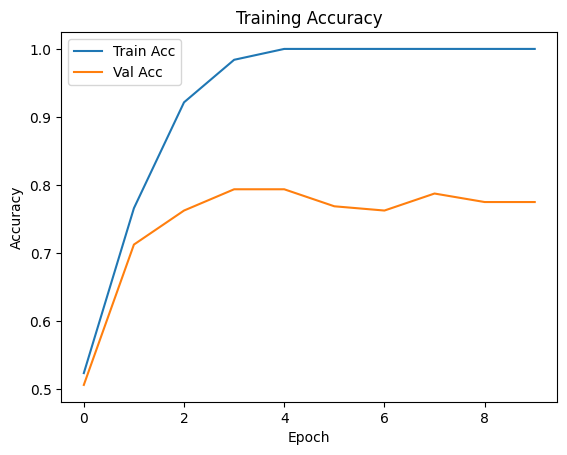

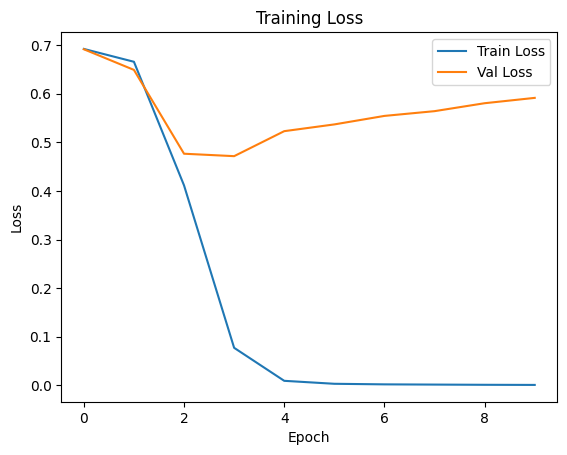

## 6. User Interface

In [9]:
import json
from pathlib import Path
import numpy as np

# Load tokenizer vocabulary
TOKENIZER_JSON = Path("artifacts/tokenizer_word/tokenizer.json")

if TOKENIZER_JSON.exists():
    meta = json.loads(TOKENIZER_JSON.read_text())
    id2word = meta.get("id2word", [])
    word2id = {w: i for i, w in enumerate(id2word)}
    print(f"Loaded tokenizer vocabulary with {len(word2id)} tokens.")
else:
    raise FileNotFoundError("tokenizer.json not found. Please export it from your tokenizer notebook first.")

# Define a tokenizer-like helper
class MyTokenizer:
    def __init__(self, word2id):
        self.word2id = word2id

tokenizer = MyTokenizer(word2id)


# Helper function for prediction
def predict_sentence(sentence, tokenizer, model, max_len=200):
    """
    Convert raw text → token IDs → padded sequence → model prediction.
    """
    tokens = sentence.lower().split()
    ids = [tokenizer.word2id.get(w, 1) for w in tokens]
    if len(ids) < max_len:
        ids += [0] * (max_len - len(ids))
    else:
        ids = ids[:max_len]

    arr = np.array(ids).reshape(1, -1)
    prob = model.predict(arr, verbose=0)[0][0]
    label = "positive" if prob >= 0.4 else "negative"
    return label, prob

Loaded tokenizer vocabulary with 19779 tokens.


In [12]:
print("\nMiniTokenNLP Sentiment Classifier Demo")
print("Type a sentence below and press Enter to see its sentiment prediction.")
print("Type 'exit' to quit.\n")

while True:
    sentence = input("Enter a sentence: ").strip()
    if sentence.lower() in ["exit", "quit", "q"]:
        print("\nExiting MiniTokenNLP demo.")
        break
    if not sentence:
        continue

    label, prob = predict_sentence(sentence, tokenizer, model)
    print(f"Sentence:{sentence}\nPrediction: {label.upper()} ({prob:.2f} confidence)\n")


MiniTokenNLP Sentiment Classifier Demo
Type a sentence below and press Enter to see its sentiment prediction.
Type 'exit' to quit.

Sentence:i really love this movie
Prediction: POSITIVE (0.49 confidence)

Sentence:it was a masterpiece, every moment was amazing
Prediction: POSITIVE (0.46 confidence)

Sentence:this movie was awful
Prediction: NEGATIVE (0.38 confidence)

Sentence:the story was boring and predictable
Prediction: NEGATIVE (0.23 confidence)


Exiting MiniTokenNLP demo.
